# CIFAR-10 Dataset

Importing necessary Libraries

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#To ignore Warnings

import warnings             
warnings.filterwarnings('ignore')

In [28]:
# Function to unpickle data

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

In [29]:
# Load data from Test_batch

test_batch = unpickle('test_batch')

In [30]:
type(test_batch)   #checking datatype of file

dict

In [31]:
len(test_batch)   #checking length of data_batch5

4

In [32]:
test_batch[b'data'].shape    #Check the shape of the image data

(10000, 3072)

In [33]:
test_batch[b'data'][0]      

array([158, 159, 165, ..., 124, 129, 110], dtype=uint8)

In [34]:
image=test_batch[b'data'][0]      #Extract and reshape the image data
image=image.reshape(3,32,32)
image

array([[[158, 159, 165, ..., 137, 126, 116],
        [152, 151, 159, ..., 136, 125, 119],
        [151, 151, 158, ..., 139, 130, 120],
        ...,
        [ 68,  42,  31, ...,  38,  13,  40],
        [ 61,  49,  35, ...,  26,  29,  20],
        [ 54,  56,  45, ...,  24,  34,  21]],

       [[112, 111, 116, ...,  95,  91,  85],
        [112, 110, 114, ...,  95,  91,  88],
        [110, 109, 111, ...,  98,  95,  89],
        ...,
        [124, 100,  88, ...,  97,  64,  85],
        [116, 102,  85, ...,  82,  82,  64],
        [107, 105,  89, ...,  77,  84,  67]],

       [[ 49,  47,  51, ...,  36,  36,  33],
        [ 51,  40,  45, ...,  31,  32,  34],
        [ 47,  33,  36, ...,  34,  34,  33],
        ...,
        [177, 148, 137, ..., 146, 108, 127],
        [168, 148, 132, ..., 130, 126, 107],
        [160, 149, 132, ..., 124, 129, 110]]], dtype=uint8)

In [35]:
# Reshape the entire dataset and transpose dimensions

data=test_batch[b'data']
labels = test_batch[b'labels']
data=data.reshape(len(data),3,32,32).transpose(0,2,3,1)

#Display the Shape of the reshaped data

print(data.shape)    


(10000, 32, 32, 3)


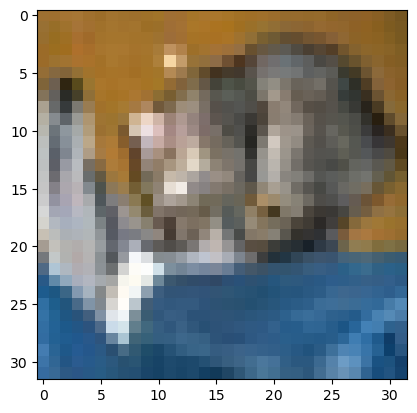

In [36]:
plt.imshow(data[0])  # Display the first image

In [37]:
test_batch=1

In [38]:
data_list=[]

In [54]:
# Create a list for data in the desired format for a DataFrame

for i in range(len(data)):
    d1=data[i].flatten()     #here we don't have labels because this is the test set
     
    data_list.append(list(d1)) 

In [48]:
# Define column names for the DataFrame

column1=[f'Pixel_{i}' for i in range(len(data_list[0]))]

In [49]:
df=pd.DataFrame(data_list,columns=column1)   # Create a DataFrame

In [50]:
df.shape      #Shape of the DataFrame

(10000, 3072)

In [56]:
# Save the DataFrame to a CSV file

csv_filename = f'cifar10_batch_{test_batch}.csv'
df.to_csv("test_set.csv", index=False)

In [57]:
df.head(5)   #Display the shape and the first 5 rows of the DataFrame

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_3062,Pixel_3063,Pixel_3064,Pixel_3065,Pixel_3066,Pixel_3067,Pixel_3068,Pixel_3069,Pixel_3070,Pixel_3071
0,-98,112,49,-97,111,47,-91,116,51,-90,...,-111,24,77,124,34,84,-127,21,67,110
1,-21,-21,-21,-25,-25,-25,-24,-24,-24,-24,...,-93,-88,-73,-78,-76,-61,-65,-70,-56,-57
2,-98,-66,-34,-98,-69,-38,-117,-90,-62,-124,...,37,5,6,8,4,5,3,7,8,7
3,-101,-100,-107,-89,-80,-69,-80,-77,-63,-66,...,53,60,63,50,64,65,52,73,68,50
4,65,68,50,70,81,64,48,64,46,30,...,-109,-113,-77,-120,-102,-71,-110,-128,-100,117


In [55]:
df.ndim    #Check dimensionality of data frame

2